In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the datasets 
surveydata_test = pd.read_csv('Surveydata_test_(2).csv')
surveydata_train = pd.read_csv('Surveydata_train_(2).csv')
traveldata_test = pd.read_csv('Traveldata_test_(2).csv')
traveldata_train = pd.read_csv('Traveldata_train_(2).csv')

## EDA

In [3]:
# Function to get initial data summary on all different datasets

def dataset_summary(df, n=5):
    """
    Prints the head, tail, and information of the provided pandas DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame to summarize.
    n (int): Number of rows to display from the head and tail of the DataFrame. Default is 5.

    Returns:
    None
    """
    print("Head of the DataFrame:")
    print(df.head(n))
    print("\nShape of the DataFrame:")
    print(df.shape)
    print("\nInfo of the DataFrame:")
    print(df.info())
    print("\nMissing values of the DataFrame:")
    print(df.isna().sum())

In [4]:
dataset_summary(traveldata_train)

Head of the DataFrame:
         ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0  

Shape of the DataFrame:
(94379, 9)

Info of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94

In [5]:
dataset_summary(surveydata_train)

Head of the DataFrame:
         ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Go

In [6]:
dataset_summary(surveydata_test)

Head of the DataFrame:
         ID    Seat_Comfort Seat_Class Arrival_Time_Convenient    Catering  \
0  99900001      Acceptable  Green Car              Acceptable  Acceptable   
1  99900002  Extremely Poor   Ordinary                    Good        Poor   
2  99900003       Excellent   Ordinary               Excellent   Excellent   
3  99900004      Acceptable  Green Car               Excellent  Acceptable   
4  99900005       Excellent   Ordinary          Extremely Poor   Excellent   

   Platform_Location Onboard_Wifi_Service Onboard_Entertainment  \
0         Manageable    Needs Improvement             Excellent   
1         Manageable           Acceptable                  Poor   
2    Very Convenient            Excellent             Excellent   
3    Very Convenient                 Poor            Acceptable   
4  Needs Improvement            Excellent             Excellent   

  Online_Support Ease_of_Online_Booking    Onboard_Service            Legroom  \
0           Good        

In [7]:
# Write a function to merge datasets 

def merge_datasets_on_id(df1, df2):
    """
    Merge two pandas DataFrames on the 'ID' column.

    Args:
    df1 (pd.DataFrame): The first DataFrame.
    df2 (pd.DataFrame): The second DataFrame.

    Returns:
    pd.DataFrame: A DataFrame resulting from merging df1 and df2 on the 'ID' column.
    """
    merged_df = pd.merge(df1, df2, on='ID', how='inner')
    return merged_df


In [8]:
train_df = merge_datasets_on_id(traveldata_train, surveydata_train)
test_df = merge_datasets_on_id(traveldata_test, surveydata_test)

In [9]:
train_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [11]:
# Create function to separate numerical and categorical columns


def get_categorical_columns(df, numerical_cols):
    """
    Identifies categorical columns in a DataFrame by excluding the specified numerical columns.

    Args:
    df (pd.DataFrame): The DataFrame from which to extract categorical column names.
    numerical_cols (list): A list of column names that are numerical.

    Returns:
    list: A list of column names in the DataFrame that are considered categorical.
    """
    all_columns = set(df.columns)
    numerical_columns = set(numerical_cols)
    categorical_columns = list(all_columns - numerical_columns)
    return categorical_columns


In [12]:
# separate the numeric and categorical columns
num_cols_train = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'ID', 'Overall_Experience']
cat_cols_train = get_categorical_columns(train_df, num_cols_train)

In [13]:
# separate the numeric and categorical columns
num_cols_test = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'ID']
cat_cols_test = get_categorical_columns(test_df, num_cols_test)

In [14]:
num_cols_train_stat = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

# Checking summary statistics
train_df[num_cols_train_stat].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0


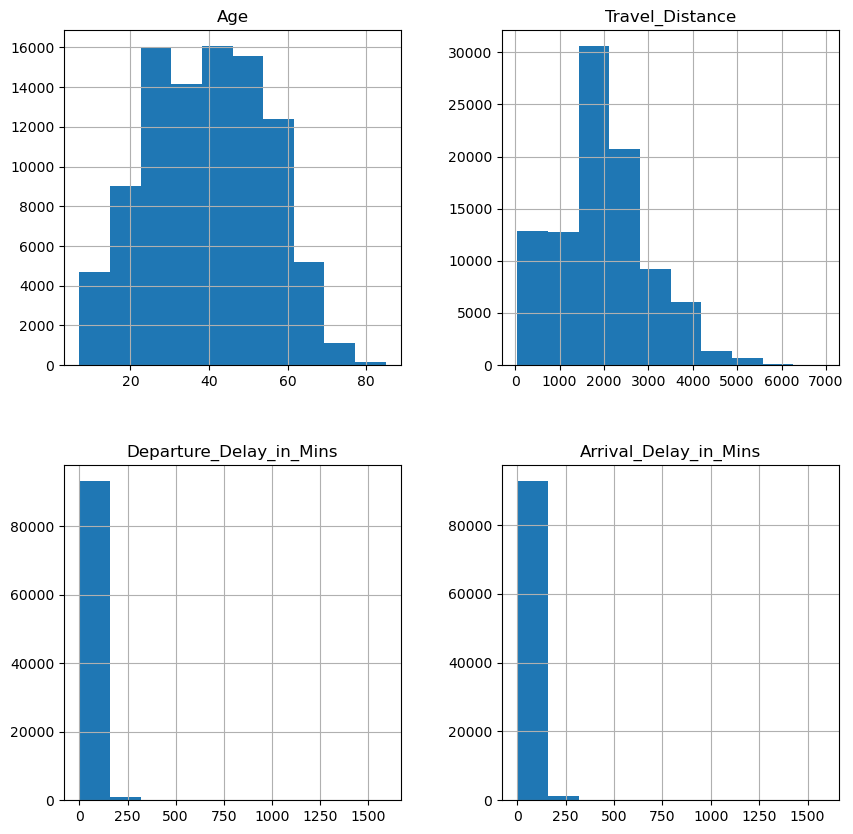

In [15]:
# Creating histograms
train_df[num_cols_train_stat].hist(figsize = (10, 10))

plt.show()

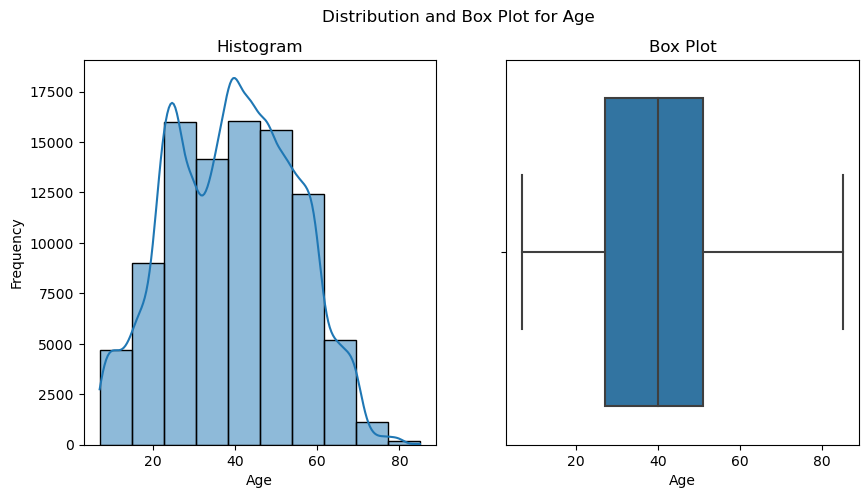

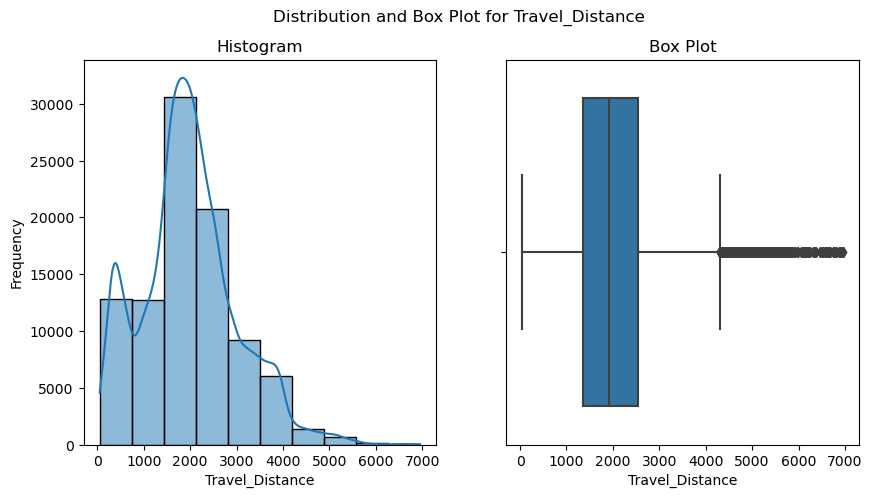

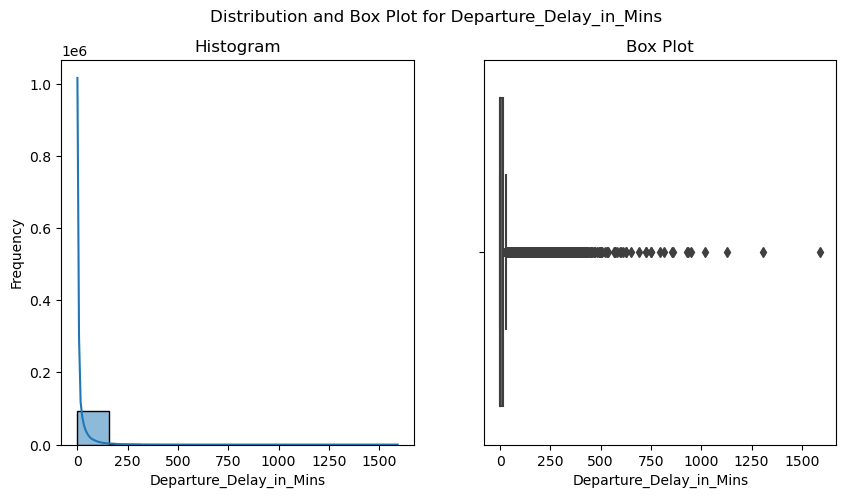

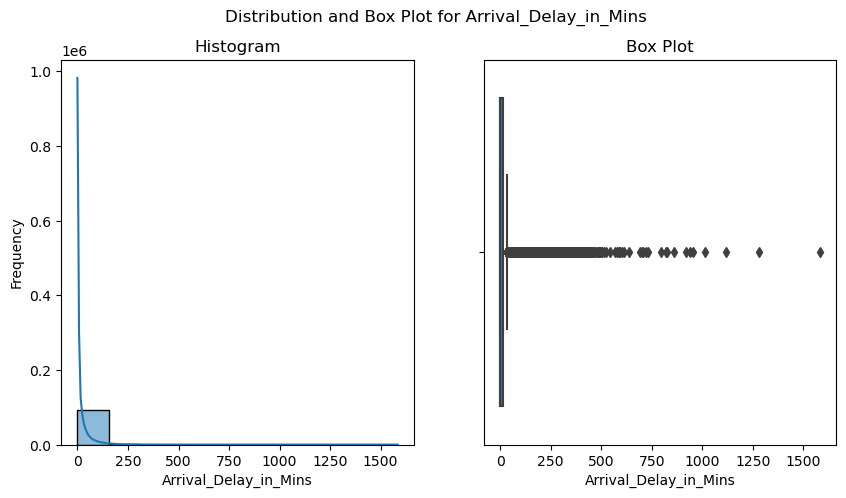

In [16]:
# Plotting distributions and box plots for each numerical column
for column in train_df[num_cols_train_stat].columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    fig.suptitle(f'Distribution and Box Plot for {column}')

    # Histogram
    sns.histplot(train_df[num_cols_train_stat][column], bins=10, kde=True, ax=axes[0])
    axes[0].set_title('Histogram')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Box Plot
    sns.boxplot(x=train_df[num_cols_train_stat][column], ax=axes[1])
    axes[1].set_title('Box Plot')
    axes[1].set_xlabel(column)

    plt.show()

In [17]:
# Printing the % sub categories of each category.
for i in cat_cols_train:

    print(train_df[i].value_counts(normalize = True))

    print('*' * 40)

Catering
Acceptable           0.215652
Needs Improvement    0.209930
Good                 0.209825
Poor                 0.161821
Excellent            0.157115
Extremely Poor       0.045657
Name: proportion, dtype: float64
****************************************
Arrival_Time_Convenient
Good                 0.229072
Excellent            0.206954
Acceptable           0.177615
Needs Improvement    0.175426
Poor                 0.160236
Extremely Poor       0.050697
Name: proportion, dtype: float64
****************************************
Gender
Female    0.507041
Male      0.492959
Name: proportion, dtype: float64
****************************************
CheckIn_Service
Good                 0.281033
Acceptable           0.273621
Excellent            0.208278
Needs Improvement    0.118958
Poor                 0.118099
Extremely Poor       0.000011
Name: proportion, dtype: float64
****************************************
Type_Travel
Business Travel    0.688373
Personal Travel    0.311627
Na

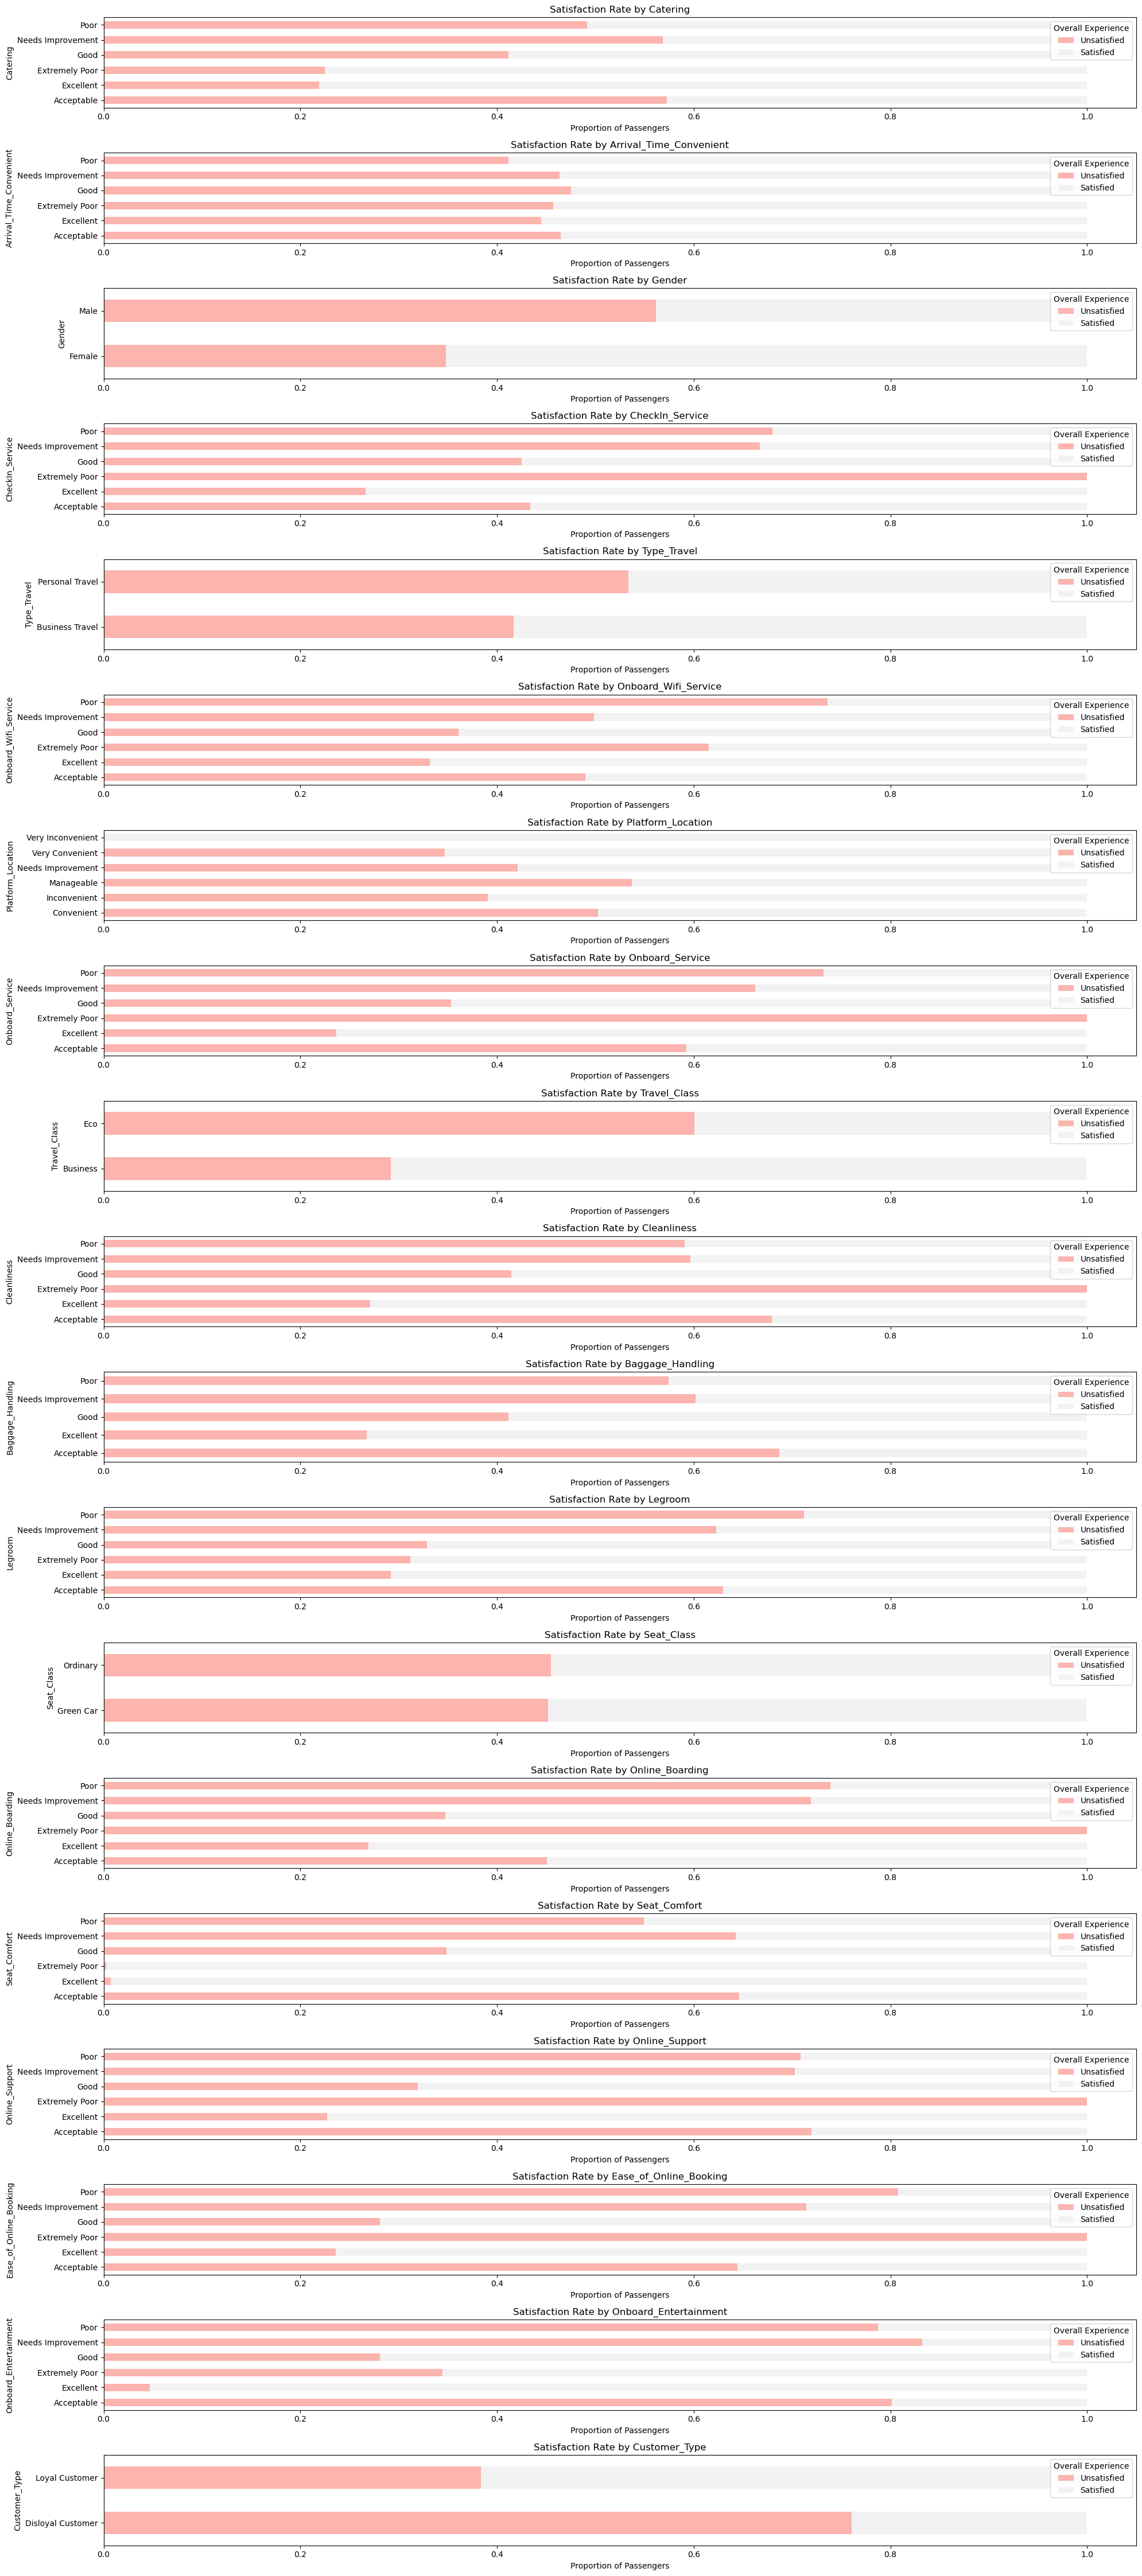

In [18]:
# Setting up the figure size for large plots
plt.figure(figsize=(20, 45))

for index, column in enumerate(cat_cols_train, start=1):
    plt.subplot(len(cat_cols_train), 1, index)
    
    # Calculate proportions
    proportion_data = train_df.groupby([column, 'Overall_Experience']).size().unstack()
    proportion_data = proportion_data.div(proportion_data.sum(axis=1), axis=0)
    
    # Plot
    proportion_data.plot(kind='barh', stacked=True, ax=plt.gca(), colormap='Pastel1')
    plt.title(f'Satisfaction Rate by {column}')
    plt.xlabel('Proportion of Passengers')
    plt.ylabel(f'{column}')
    plt.legend(title='Overall Experience', labels=['Unsatisfied', 'Satisfied'])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [19]:
# Look why very inconvenient platform location will result in satisfied overall experience 
train_df[train_df['Platform_Location']=='Very Inconvenient']

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
49219,98849220,Female,Loyal Customer,40.0,Personal Travel,Eco,1968,0.0,0.0,1,...,Good,Good,Good,Poor,Poor,Poor,Poor,Acceptable,Poor,Good
79337,98879338,Female,Loyal Customer,55.0,Business Travel,Business,2063,0.0,0.0,1,...,Good,Good,Good,Poor,Poor,Poor,Poor,Acceptable,Poor,Good


It looks like the platform location has less impact on the overall experience based on this two results. 

## Data Encoding

In [20]:
def encode_ordinal_variables(df, common_ordinal_variables):
    """
    Encodes ordinal variables in a DataFrame using pre-defined mappings.

    Parameters:
    df (DataFrame): The pandas DataFrame to encode.
    common_ordinal_variables (list of str): List of column names to apply common ordinal encoding.

    Returns:
    DataFrame: The encoded pandas DataFrame.
    """

    # Define the encoding mappings as functions
    def encode_platform_location(value):
        mapping = {
            'Very Inconvenient': 0,
            'Inconvenient': 1,
            'Needs Improvement': 2,
            'Manageable': 3,
            'Convenient': 4,
            'Very Convenient': 5
        }
        return mapping.get(value, np.NaN)  # Return NaN for unknown values


    def encode_common_ordinal(value):
        mapping = {
            'Extremely Poor': 0,
            'Poor': 1,
            'Needs Improvement': 2,
            'Acceptable': 3,
            'Good': 4,
            'Excellent': 5
        }
        return mapping.get(value, np.NaN)  # Return NaN for unknown values

    # Apply encoding to the DataFrame for individual columns
    if 'Platform_Location' in df.columns:
        df['Platform_Location'] = df['Platform_Location'].apply(encode_platform_location)

    # Apply common ordinal encoding to each of the specified variables
    for variable in common_ordinal_variables:
        if variable in df.columns:
            df[variable] = df[variable].apply(encode_common_ordinal)

    return df


In [21]:
common_ordinal_variables = [
    'Seat_Comfort', 'Arrival_Time_Convenient', 'Catering',
    'Onboard_Wifi_Service', 'Onboard_Entertainment',
    'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
    'Legroom', 'Baggage_Handling', 'CheckIn_Service',
    'Cleanliness', 'Online_Boarding'
]

#copy the train_df
train_df_copy = train_df.copy()

# Applying the encoding function to train data
encoded_train_df = encode_ordinal_variables(train_df_copy, common_ordinal_variables)
encoded_train_df.head()  # Show the first few rows of the encoded DataFrame


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [22]:
#copy the test_df
test_df_copy = test_df.copy()

# Applying the encoding function to test data
encoded_test_df = encode_ordinal_variables(test_df_copy, common_ordinal_variables)
encoded_test_df.head()  # Show the first few rows of the encoded DataFrame


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,3.0,...,2.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,1.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,0.0,...,3.0,1.0,3.0,3.0,5.0,3.0,4.0,3.0,5.0,3.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,5.0,...,5.0,5.0,5.0,2.0,2.0,2.0,2.0,4.0,2.0,5.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,3.0,...,1.0,3.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,5.0,...,5.0,5.0,5.0,5.0,NaN,3.0,5.0,5.0,5.0,5.0


## Check whether there are errors in entries, such as '%', '@', etc., besides missing values

**NOTE: as the rest numerical data types are all either int or float, it's not possible that there are special entries like % and @, etc. Thus, we only check the objects.**

In [23]:
def list_unique_values(df):
    """
    Lists all unique values in categorical columns of a pandas DataFrame.
    
    Parameters:
    df (DataFrame): The pandas DataFrame to analyze.
    
    Returns:
    dict: A dictionary with column names as keys and sets of unique values as values for categorical columns.
    """
    unique_values = {}
    # Loop through each column in the DataFrame
    for column in df.columns:
        # Determine if the column is categorical based on its data type
        if df[column].dtype == 'object':
            # Store the unique values in a set (sets automatically discard duplicates)
            unique_values[column] = set(df[column].unique())

    return unique_values



In [24]:
# On train data
unique_values_encoded_train_df = list_unique_values(encoded_train_df)
unique_values_encoded_train_df

{'Gender': {'Female', 'Male', nan},
 'Customer_Type': {'Disloyal Customer', 'Loyal Customer', nan},
 'Type_Travel': {'Business Travel', 'Personal Travel', nan},
 'Travel_Class': {'Business', 'Eco'},
 'Seat_Class': {'Green Car', 'Ordinary'}}

In [25]:
encoded_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  float64
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  float64
 13  Catering                 85638 non-null  float64
 14  Platform_Location     

In [26]:
encoded_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  float64
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  float64
 12  Catering                 32245 non-null  float64
 13  Platform_Location        35590 non-null  float64
 14  Onboard_Wifi_Service  

In [27]:
# On test data
unique_values_encoded_test_df = list_unique_values(encoded_test_df)
unique_values_encoded_test_df

{'Gender': {'Female', 'Male', nan},
 'Customer_Type': {'Disloyal Customer', 'Loyal Customer', nan},
 'Type_Travel': {'Business Travel', 'Personal Travel', nan},
 'Travel_Class': {'Business', 'Eco'},
 'Seat_Class': {'Green Car', 'Ordinary'}}

In [28]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, categorical_columns):
    """
    Encodes categorical columns using LabelEncoder, preserving NaN values.
    
    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        categorical_columns (list): List of column names to be encoded.
    
    Returns:
        dict: A dictionary containing the encoded mappings for each column.
    """
    encoders = {}
    for column in categorical_columns:
        le = LabelEncoder()
        # Fit label encoder on non-null data
        non_null_data = df[column][df[column].notna()]
        le.fit(non_null_data)
        
        # Transform all non-null data
        df.loc[df[column].notna(), column] = le.transform(non_null_data)
        
        # Store the encoder for this column along with its classes for potential inverse transformation
        encoders[column] = dict(zip(le.classes_, le.transform(le.classes_)))
    
    return encoders


In [29]:
# Define the columns you want to encode
categorical_columns = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class']

# Encode the categorical columns and get the encoders
encoded_label_mappings_train = encode_categorical_columns(encoded_train_df, categorical_columns)

# Print the updated DataFrame and the mappings
print(encoded_train_df)
print("\nEncoded Label Mappings:")
for key, value in encoded_label_mappings_train.items():
    print(f"{key}: {value}")


             ID Gender Customer_Type   Age Type_Travel Travel_Class  \
0      98800001      0             1  52.0         NaN            0   
1      98800002      1             1  48.0           1            1   
2      98800003      0             1  43.0           0            0   
3      98800004      0             1  44.0           0            0   
4      98800005      0             1  50.0           0            0   
...         ...    ...           ...   ...         ...          ...   
94374  98894375      1             1  32.0           0            0   
94375  98894376      1             1  44.0           0            0   
94376  98894377      1           NaN  63.0           0            0   
94377  98894378      1             1  16.0           1            1   
94378  98894379      1             1  54.0         NaN            1   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0                  272                      0.0                    5.0   

In [30]:
encoded_train_df.isna().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [31]:
# Encode the categorical columns and get the encoders
encoded_label_mappings_test = encode_categorical_columns(encoded_test_df, categorical_columns)

# Print the updated DataFrame and the mappings
print(encoded_test_df)
print("\nEncoded Label Mappings:")
for key, value in encoded_label_mappings_test.items():
    print(f"{key}: {value}")


             ID Gender Customer_Type   Age Type_Travel Travel_Class  \
0      99900001      0           NaN  36.0           0            0   
1      99900002      0             0  21.0           0            0   
2      99900003      1             1  60.0           0            0   
3      99900004      0             1  29.0           1            1   
4      99900005      1             0  18.0           0            0   
...         ...    ...           ...   ...         ...          ...   
35597  99935598      1             1   8.0           1            1   
35598  99935599      0             1  53.0           0            0   
35599  99935600      1             0  22.0           0            1   
35600  99935601      0             1  67.0           1            1   
35601  99935602      1           NaN  20.0           1            1   

       Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0                  532                      0.0                    0.0   

In [32]:
encoded_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  float64
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  float64
 13  Catering                 85638 non-null  float64
 14  Platform_Location     

In [33]:
encoded_train_df

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,1,52.0,NaN,0,272,0.0,5.0,0,...,4.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,2.0,1.0
1,98800002,1,1,48.0,1,1,2200,9.0,0.0,0,...,4.0,1.0,4.0,4.0,5.0,2.0,1.0,2.0,4.0,4.0
2,98800003,0,1,43.0,0,0,1061,77.0,119.0,1,...,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
3,98800004,0,1,44.0,0,0,780,13.0,18.0,0,...,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0
4,98800005,0,1,50.0,0,0,1981,0.0,0.0,1,...,2.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,1,1,32.0,0,0,1357,83.0,125.0,0,...,1.0,1.0,1.0,1.0,4.0,4.0,4.0,2.0,4.0,1.0
94375,98894376,1,1,44.0,0,0,592,5.0,11.0,1,...,2.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0
94376,98894377,1,NaN,63.0,0,0,2794,0.0,0.0,1,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0
94377,98894378,1,1,16.0,1,1,2744,0.0,0.0,0,...,4.0,2.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,4.0


In [35]:
encoded_train_df.to_csv('encoded_train_df.csv')
encoded_test_df.to_csv('encoded_test_df.csv')

## Check Correlations

In [36]:
encoded_train_df_copy = encoded_train_df.copy()

# Drop the 'ID' column as it's typically a unique identifier not useful for correlation analysis
encoded_train_df_copy.drop('ID', axis=1, inplace=True)

# Impute missing numerical data (optional, simple median imputation for demonstration)
for column in encoded_train_df_copy.select_dtypes(include=np.number).columns:
    encoded_train_df_copy[column].fillna(encoded_train_df_copy[column].median(), inplace=True)

# Calculate the correlation matrix
correlation_matrix = encoded_train_df_copy.corr()

# Print the correlation matrix
correlation_matrix


,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
Gender,1.000000,0.029701,0.005022,0.012177,-0.009272,0.126122,0.002540,0.000573,-0.214677,-0.072353,...,-0.032253,-0.142367,-0.091240,-0.083155,-0.055586,-0.071815,-0.014804,-0.016027,-0.015927,-0.047297
Customer_Type,0.029701,1.000000,0.281575,0.308613,-0.084169,-0.020178,-0.003243,-0.004570,0.292542,0.038355,...,0.075812,0.232393,0.185886,0.152467,0.081477,0.097796,-0.000569,0.041824,0.002957,0.108667
Age,0.005022,0.281575,1.000000,-0.043789,-0.136799,-0.251518,-0.007987,-0.010641,0.116212,0.007996,...,0.011522,0.131475,0.117289,0.068904,0.060750,0.082694,-0.018021,0.028649,-0.018462,0.035591
Type_Travel,0.012177,0.308613,-0.043789,1.000000,0.551977,-0.122860,-0.010241,-0.010437,-0.108498,0.014643,...,-0.014807,-0.079894,-0.034373,-0.023362,0.037245,0.012097,0.049684,0.058520,0.059456,-0.004913
Travel_Class,-0.009272,-0.084169,-0.136799,0.551977,1.000000,-0.165618,0.007354,0.012299,-0.310013,0.032533,...,-0.061263,-0.247824,-0.182712,-0.132344,-0.158326,-0.132137,-0.128855,-0.139706,-0.123300,-0.100697
Travel_Distance,0.126122,-0.020178,-0.251518,-0.122860,-0.165618,1.000000,0.114078,0.110896,-0.041582,-0.045098,...,0.010124,-0.028173,-0.033172,-0.023005,-0.032879,-0.030420,0.019181,0.002586,0.007209,0.006164
Departure_Delay_in_Mins,0.002540,-0.003243,-0.007987,-0.010241,0.007354,0.114078,1.000000,0.958940,-0.073810,-0.025193,...,-0.032534,-0.030393,-0.033302,-0.036970,-0.034755,0.000403,-0.012738,-0.021171,-0.066798,-0.019975
Arrival_Delay_in_Mins,0.000573,-0.004570,-0.010641,-0.010437,0.012299,0.110896,0.958940,1.000000,-0.080027,-0.026775,...,-0.035000,-0.033054,-0.035585,-0.040125,-0.037444,-0.002878,-0.017654,-0.024411,-0.071894,-0.021902
Overall_Experience,-0.214677,0.292542,0.116212,-0.108498,-0.310013,-0.041582,-0.073810,-0.080027,1.000000,0.243357,...,0.229621,0.524749,0.391825,0.432110,0.334353,0.302461,0.257585,0.262505,0.255596,0.339148
Seat_Comfort,-0.072353,0.038355,0.007996,0.014643,0.032533,-0.045098,-0.025193,-0.026775,0.243357,1.000000,...,0.127747,0.425321,0.117952,0.209756,0.119390,0.136670,0.118228,0.041175,0.108168,0.128689


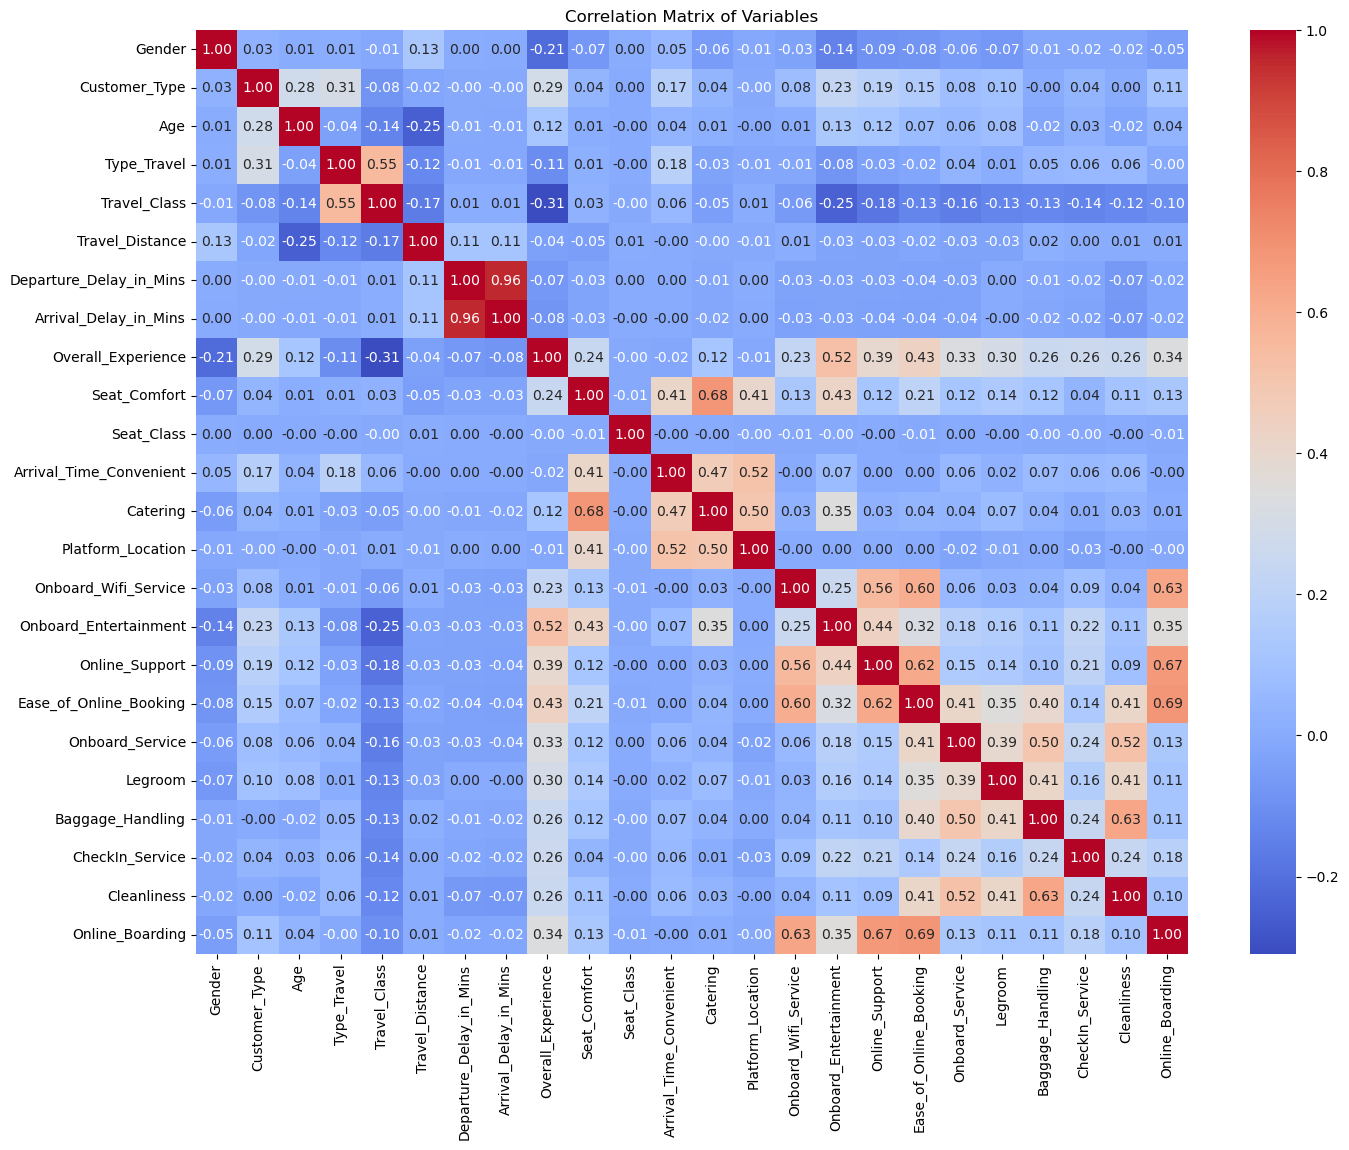

In [37]:
# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()
